# Overlapping Generation Model
## with population and technology growth

**Table of contents**<a id='toc0_'></a>    
- 1. [Model description](#toc1_)    
  - 1.1. [Method of solution](#toc1_1_)    
- 2. [Analytical solution](#toc2_)    
- 3. [Numerical solution](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In this project we will simulate the **overlapping generations (OLG) model** with population and technology growth as our extentions. 

In [1]:
# First we import needed extentions, packages 
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import optimize

# Plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# Model
from Overall import OLGModelClass

# Symbolic math
import sympy as sm
from IPython.display import display

## 1. <a id='toc1_'></a>[Model description](#toc0_)

Capital letters are aggregate variables while lowercase letters are individual level.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** <font color=blue>Population growth rate</font> is n.
A life consists of two periods, *young* and *old*. 
Young population at time $t$ is $L_t$, while old population is $L_{t-1}$. It holds that:

$$
\begin{aligned}
L_t & = L_{t-1}(1+n) \\ 
\text{with}\ n &>-1
\end{aligned}
$$

**Households:** 
No unemployment is assumed in the young population so labour market clears, with $L_t$ equal to $N_t$, which represents the employed workers in the economy. Each individual supplies one unit of labour. 
At the aggregate level, young individuals earn a <font color=blue>after tax wage</font> $(1-\tau_w)w_{t}N_{t}$.<br>
Consumption as young and old are denoted by $C_{1t}$ and $C_{2t+1}$. 
The <font color=blue>after-tax return on saving</font> is $(1-\tau_{r})r_{t+1}$.<br>
Utility is:
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$

In case of $sigma=1$ we have logarithmic utility and the household problem becomes:

$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}log{C_{1t}}+\beta(log{C_{2t+1}}),\,\,\,\beta > -1\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$

Where $r_{t}$ is the <font color=blue>interest rate on savings</font>, $S_{t}$ are the <font color=blue>total savings</font> and $s_{t}$ is the <font color=blue>saving rate</font>.
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the <font color=blue>rental rate</font> $r_{t}^{K}$,
and hires labor $N_{t}$ at the <font color=blue>wage rate</font> $w_{t}$. Firms have access
to the CES production function, where $A_t$ is the total factor productivity (which grows with rate $g$ every period) at time t:
$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=A_t[\gamma K_{t-1}^{-\theta}+(1-\gamma)L_{t}^{-\theta}]^{\frac{1}{-\theta}},\,\,\,\theta>-1,\gamma\in(0,1)
\end{aligned}
$$

We'll focus on the special case of Cobb-Douglas production function:

$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=A_tK_{t-1}^{(1-\alpha)}L_{t}^{\alpha}
\end{aligned}
$$

    
<font color=blue>Profits</font> are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Choose <font color=blue>public consumption (expenditure)</font>, $G_{t}$, and <font color=blue>(income) tax rates</font> $\tau_w \in [0,1]$ and $\tau_r \in [0,1]$. <font color=blue>Total tax revenue</font> is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}N_{t}   
\end{aligned}
$$

Where $B_{t-1}$ is the <font color=blue>value of bond outstanding</font>.
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$

Where $r^b_{t}$ 
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $L_{t}=N_{t}$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

Where $I_{t}$ is investment.

### 1.1. <a id='toc1_1_'></a>[Method of solution](#toc0_)

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},L_{t})=A_t\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{E}(K_{t-1},L_{t})=A_t(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.<br>
*Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},L_t)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{L}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
L_{t} & = L_{t-1}(1+n)\\
A_{t} & = A_{t-1}(1+g)
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Solution algorithm:** Simulate forward choosing $s_{t}$ so
that we always have

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

## 2. <a id='toc1_2_'></a>[Analytical solution](#toc0_)

Given the above model description we attempted to solve part of it analytically.
We try to find the optimal saving rate, given logarythmic period utility function. 
For this purpose we import a function made ad-hoc to solve the household problem analitycally while showing each step of the derivation.
The function provides also characterization for the solving equation. The optimal value of $s_t$ is determined, given the value of beta:

In [2]:
# import sympy method for solving recognizing log
from sympy import *
from Analytical_solver import log_analytic

# call ad-hoc analytical solver with beta parameter value = 0.8
log_analytic(beta_val=0.8)

Objective function:


beta*log(C_{2t+1}) + log(c_{1t})



Budget constraints:


Eq(N_{t}*s_t*w_t*(1 - tau_w), S_t)

Eq(N_{t}*w_t*(1 - s_t)*(1 - tau_w), c_{1t})

Eq(S_t*(r_{t+1}*(1 - tau_r) + 1), C_{2t+1})



Substitution of St inside function for consumption of old agents:


Eq(N_{t}*s_t*w_t*(1 - tau_w)*(r_{t+1}*(1 - tau_r) + 1), C_{2t+1})



Substitution of old and young consumption inside objective function:


beta*log(N_{t}*s_t*w_t*(r_{t+1}*tau_r*tau_w - r_{t+1}*tau_r - r_{t+1}*tau_w + r_{t+1} - tau_w + 1)) + log(N_{t}*w_t*(s_t*tau_w - s_t - tau_w + 1))



FOC of objective modified function wrt st:


beta/s_t + (tau_w - 1)/(s_t*tau_w - s_t - tau_w + 1)



Value of st that solves FOC=0:


beta/(beta + 1)



Optimal value of st for beta = 0.8:


0.4444444444444445

## 3. <a id='toc1_4_'></a>[Numerical solution](#toc0_)

We focus on a particular case:
1. Production is Cobb-Douglas ($\theta = 0$)
2. Utility is logarithmic ($\sigma = 1$)
3. The government is not doing anything ($\tau_w=\tau_r=0$, $T_t = G_t = 0$ and $B_t = 0$) 

**The analytical steady state when population technology are growing can be defined as:***

$$ \lim_{t\rightarrow\infty} K_t = \left(\frac{1-\alpha}{(1+n)(1+g)(1+1/\beta)}\right)^{\frac{1}{1-\alpha}} $$

That would be the <font color=blue>steady state level of capital</font>

We simulate the model for 50 periods:

In [3]:
model = OLGModelClass()
par = model.par 
sim = model.sim 

# define production parameters
par.production_function = 'cobb-douglas'
par.theta = 0.0

# define households utility parameter
par.sigma = 1.0

model.simulate()

initializing the model:
calling .setup()
calling .allocate()
simulation done in 0.08 secs


In [4]:
for t in range(5):
    LHS_Euler = sim.C1[t]**(-par.sigma)
    RHS_Euler = (1+sim.rt[t+1])*par.beta * sim.C2[t+1]**(-par.sigma)
    print(f't = {t:2d}: euler-error = {LHS_Euler-RHS_Euler:.8f}')

t =  0: euler-error = -0.00000000
t =  1: euler-error = -0.00000000
t =  2: euler-error = -0.00000000
t =  3: euler-error = -0.00000000
t =  4: euler-error = 0.00000000


**Plot and check with analytical solution:**

NameError: name 'K_ss' is not defined

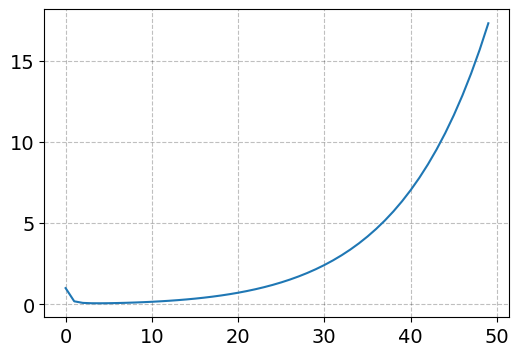

In [5]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.axhline(K_ss,ls='--',color='black',label='analytical steady state')
ax.legend(frameon=True)
fig.tight_layout()
K_lag_old = model.sim.K_lag.copy()

Above we see how $K_{t-1}$ evolve over the 50 periods. It it seen that $K_{t-1}$ convert away from steady state and grow exponential.

**Task:** Test if the starting point matters?

RUn again the full simulation, but with # par.K_lag_ini = 1.9*K_ss # before the start. Now the initial kapital accumulated is over the steady state level and we should expect it to decrease overtime

**Now we want to check for when $\sigma \not= 1$ ?and with an active government?:** 

In [ ]:
# a. production (close to cobb-douglas)
par.production_function = 'ces'
par.theta = 0.001

# b. household (close to logarithmic)
par.sigma = 1.1

# c. goverment (weakly active)
par.tau_w = 0.01
par.tau_r = 0.01

# d. simulate
model.simulate()

simulation done in 0.21 secs


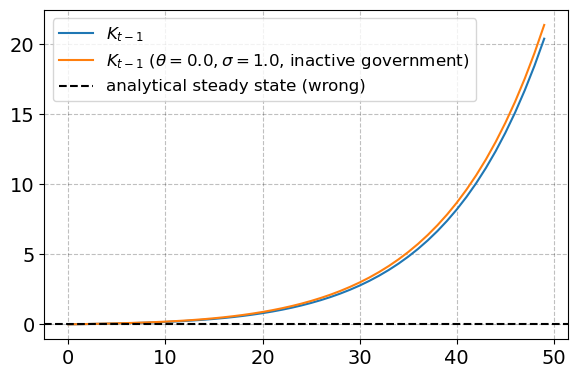

In [ ]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.plot(K_lag_old,label=r'$K_{t-1}$ ($\theta = 0.0, \sigma = 1.0$, inactive government)')
ax.axhline(K_ss,ls='--',color='black',label='analytical steady state (wrong)')
ax.legend(frameon=True,fontsize=12)
fig.tight_layout()